In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
test_data_fp = "./sample_data/raw_test/S1A_EW_GRDM_1SDH_20180707T122209_20180707T122309_022688_027552_A48E_icechart_cis_SGRDIFOXE_20180707T1214Z_pl_a_testdata.nc"
data = xr.open_dataset(test_data_fp)
data

<xarray.Dataset>
Dimensions:                  (sar_lines: 9997, sar_samples: 10563,
                              sar_grid_points: 441, 2km_grid_lines: 199,
                              2km_grid_samples: 211)
Dimensions without coordinates: sar_lines, sar_samples, sar_grid_points,
                                2km_grid_lines, 2km_grid_samples
Data variables: (12/31)
    nersc_sar_primary        (sar_lines, sar_samples) float32 ...
    nersc_sar_secondary      (sar_lines, sar_samples) float32 ...
    distance_map             (sar_lines, sar_samples) float32 ...
    sar_grid_line            (sar_grid_points) float64 ...
    sar_grid_sample          (sar_grid_points) float64 ...
    sar_grid_latitude        (sar_grid_points) float64 ...
    ...                       ...
    u10m_rotated             (2km_grid_lines, 2km_grid_samples) float64 ...
    v10m_rotated             (2km_grid_lines, 2km_grid_samples) float64 ...
    t2m                      (2km_grid_lines, 2km_grid_samples) float64 ...
    skt                      (2km_grid_lines, 2km_grid_samples) float64 ...
    tcwv                     (2km_grid_lines, 2km_grid_samples) float64 ...
    tclw                     (2km_grid_lines, 2km_grid_samples) float64 ...
Attributes:
    title:                               Training data file from AI4Arctic_CC...
    geometric_info:                      All variables are gridded to match S...
    sar_denoise_by_nersc_documentation:  Thermal Denoising of Cross-Polarized...

In [4]:
print(f"Dims of SAR images: {np.array(data.nersc_sar_primary).shape}")
print(f"Dims of PM & model data: {np.array(data.t2m).shape}")

Dims of SAR images: (9997, 10563)
Dims of PM & model data: (199, 211)


In [5]:
# Downsample images for visualization
HH_downsampled = np.array(data.nersc_sar_primary)[::4, ::4]
HH_downsampled_norm = (HH_downsampled - np.nanmin(HH_downsampled)) / (np.nanmax(HH_downsampled) - np.nanmin(HH_downsampled))

HV_downsampled = np.array(data.nersc_sar_secondary)[::4, ::4]
HV_downsampled_norm = (HV_downsampled - np.nanmin(HV_downsampled)) / (np.nanmax(HV_downsampled) - np.nanmin(HV_downsampled))

HH_downsampled_norm.shape

(2500, 2641)

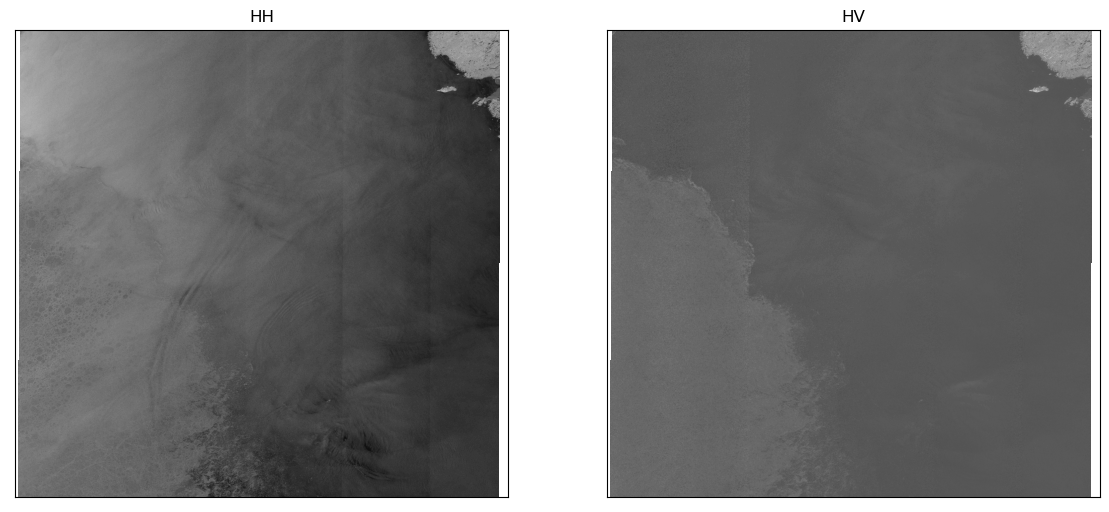

In [6]:
# Quick vis of SAR image
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(np.array(HH_downsampled_norm), cmap='gray')
axs[1].imshow(np.array(HV_downsampled_norm), cmap='gray')
axs[0].set_title("HH")
axs[1].set_title("HV")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

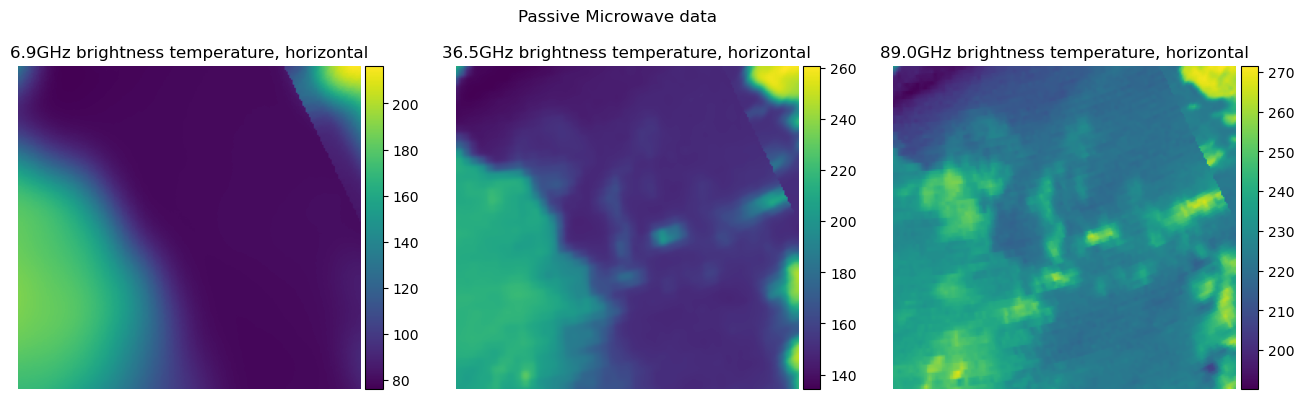

In [13]:
# Vis passive microwave data
fig, axs = plt.subplots(1, 3, figsize=(16, 4.5))
fig.suptitle("Passive Microwave data")

im1 = axs[0].imshow(data.btemp_6_9h)
divider = make_axes_locatable(axs[0])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1, orientation='vertical')
axs[0].set_title("6.9GHz brightness temperature, horizontal")

im2 = axs[1].imshow(data.btemp_36_5h)
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax2, orientation='vertical')
axs[1].set_title("36.5GHz brightness temperature, horizontal")

im3 = axs[2].imshow(data.btemp_89_0h)
divider = make_axes_locatable(axs[2])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax3, orientation='vertical')
axs[2].set_title("89.0GHz brightness temperature, horizontal")

for ax in axs:
    ax.set_axis_off()

plt.show()

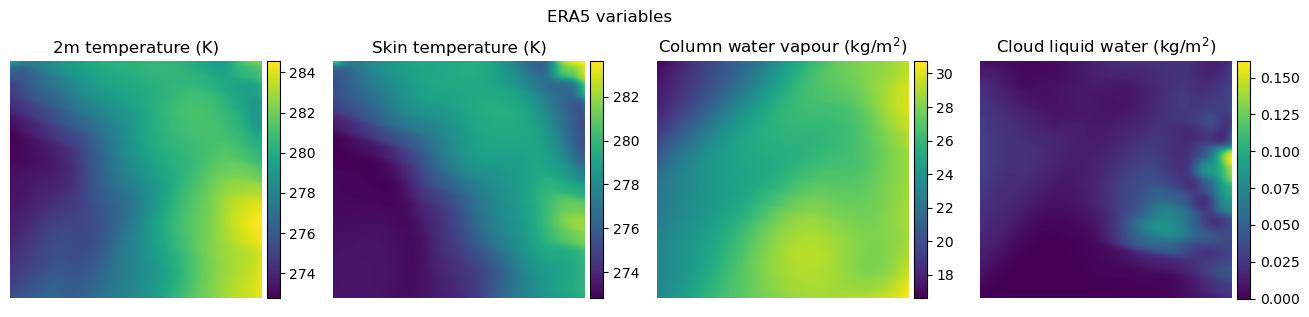

In [16]:
# Vis ERA5 variables
fig, axs = plt.subplots(1, 4, figsize=(16, 3.5))
fig.suptitle("ERA5 variables")

im1 = axs[0].imshow(data.t2m)
divider = make_axes_locatable(axs[0])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1, orientation='vertical')
axs[0].set_title("2m temperature (K)")

im2 = axs[1].imshow(data.skt)
divider = make_axes_locatable(axs[1])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax2, orientation='vertical')
axs[1].set_title("Skin temperature (K)")

im3 = axs[2].imshow(data.tcwv)
divider = make_axes_locatable(axs[2])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax3, orientation='vertical')
axs[2].set_title("Column water vapour (kg/m$^2$)")

im4 = axs[3].imshow(data.tclw)
divider = make_axes_locatable(axs[3])
cax4 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax4, orientation='vertical')
axs[3].set_title("Cloud liquid water (kg/m$^2$)")

for ax in axs:
    ax.set_axis_off()

plt.show()